# SKLearn : Inspection

#### Inspecting & Interpreting Coefficients of Linear Models.

This exercise provide insights in interpreting coefficient in linear models. It highlights
some challenges that arise when either the linear model is not appropriate to describe the dataset, or when features are correlated. The regualarization applied to the data to address those issues.

https://scikit-learn.org/stable/modules/linear_model.html

### Organization of the Notebook

Part 1 : Read Data : The Wage Dataset

Part 2 : Data Visualization

Part 3 : Model without (Numeric) Data Scaling

Part 4 : Linear Model with (Numeric) Data Scaling

Part 5 : Linear Model with Data Scaling & Regularization
Part 5a: Lasso Model Coefficient Paths
Part 5b: Ridge Model Coefficient Paths

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Part 1 
### Read Data  : The Wage Dataset

In [4]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True, parser="pandas")

X = survey.data[survey.feature_names]

In [5]:
X.shape

(534, 10)

In [6]:
X.head(3)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.2 KB


#### Describing both Numeriical as well as Categorical Features 

In [8]:
X.describe( include = "all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


#### The Target Feature: wage

In [9]:
y = survey.target.values.ravel()
survey.target.head(3)

0    5.10
1    4.95
2    6.67
Name: WAGE, dtype: float64

In [10]:
X.isnull().sum()

EDUCATION     0
SOUTH         0
SEX           0
EXPERIENCE    0
UNION         0
AGE           0
RACE          0
OCCUPATION    0
SECTOR        0
MARR          0
dtype: int64

In [11]:
X.RACE.unique()

['Hispanic', 'White', 'Other']
Categories (3, object): ['Hispanic', 'Other', 'White']

## Part 2

### Data Visualization

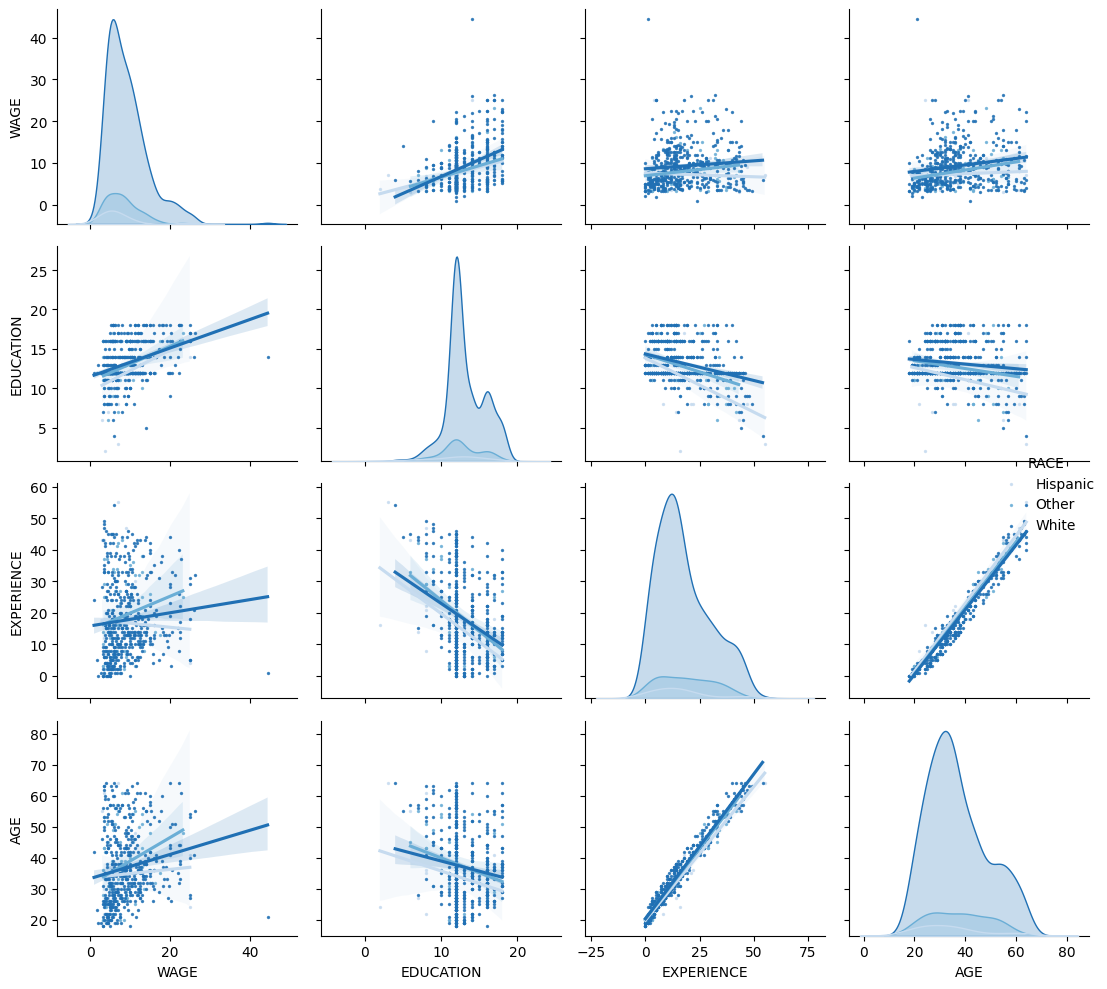

In [12]:
dataset = X.copy()
dataset.insert(0, "WAGE", y)

sns.color_palette("light:b", as_cmap=True)

sns.pairplot(
    dataset, kind="reg", diag_kind="kde", 
    palette="Blues", 
    hue="RACE",
    plot_kws=dict(scatter_kws=dict(s=2))
)

plt.tight_layout()

## Part 3 

### Model without (Numeric) Data Scaling

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

_X1 = X_train[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = X_train.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X3 = encoder.fit_transform(_X2)
_X4 = pd.DataFrame(_X3.toarray(), columns=encoder.get_feature_names_out())

x_train = pd.concat([_X1.reset_index(drop=True), _X4.reset_index(drop=True)], axis=1)


_X1 = X_test[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = X_test.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X3 = encoder.fit_transform(_X2)
_X4 = pd.DataFrame(_X3.toarray(), columns=encoder.get_feature_names_out())

x_test = pd.concat([_X1.reset_index(drop=True), _X4.reset_index(drop=True)], axis=1)

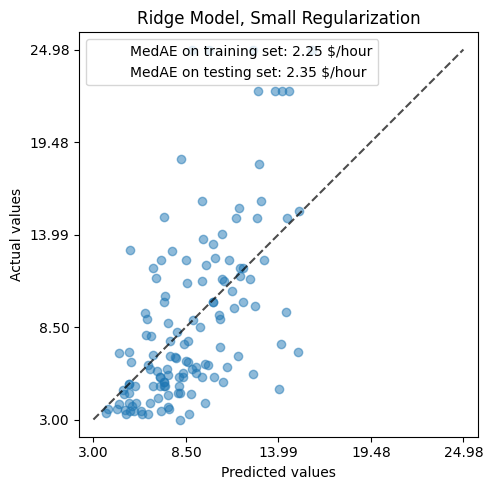

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import median_absolute_error
from sklearn.metrics import PredictionErrorDisplay


rgr = Ridge(alpha=1e-2)
rgr.fit(x_train, y_train)

mae_train = median_absolute_error(y_train, rgr.predict(x_train))
y_pred    = rgr.predict(x_test)
mae_test  = median_absolute_error(y_test, y_pred)

scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)

ax.set_title("Ridge Model, Small Regularization")

for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")

plt.tight_layout()

#### Interpreting Coefficients: 

Model Coefficients with Data without Scaling

In [16]:
feature_names = list(x_train.columns)

coefs = pd.DataFrame(
    rgr.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

# coefs

The Standard Deviations of Different Features

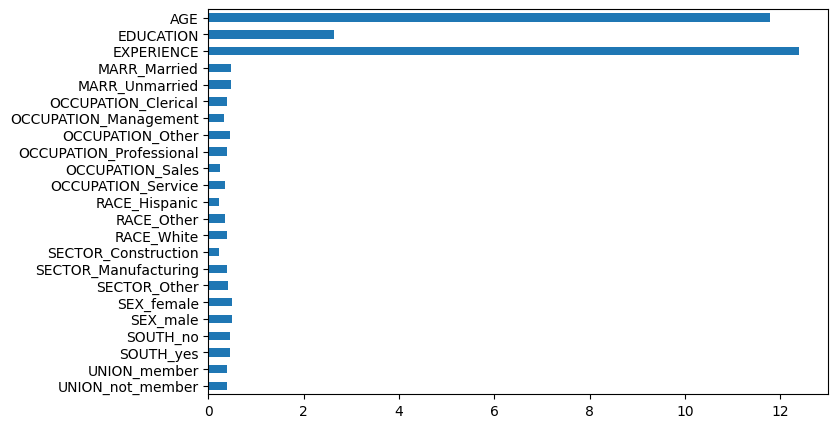

In [17]:
feature_std = x_train.std().sort_index(ascending=False, inplace=False)
feature_std.plot.barh( figsize=(8,5) )

plt.show()

#### Conditional Dependencies 
It is the dependencies between a specific feature and the target when all other features remain 
constant.

#### Un-Scaled Feature Variance 

Because of thee use of  OneHotEncoder, most of tthe features vary on a small scale, while others, such as, AGE, EXPERIENCE, & EDUCATION, varies a lot more, like several decades.

In [18]:
coefs =  coefs.sort_index(ascending=False, inplace=False)
feature_std = x_train.std().sort_index(ascending=False, inplace=False)

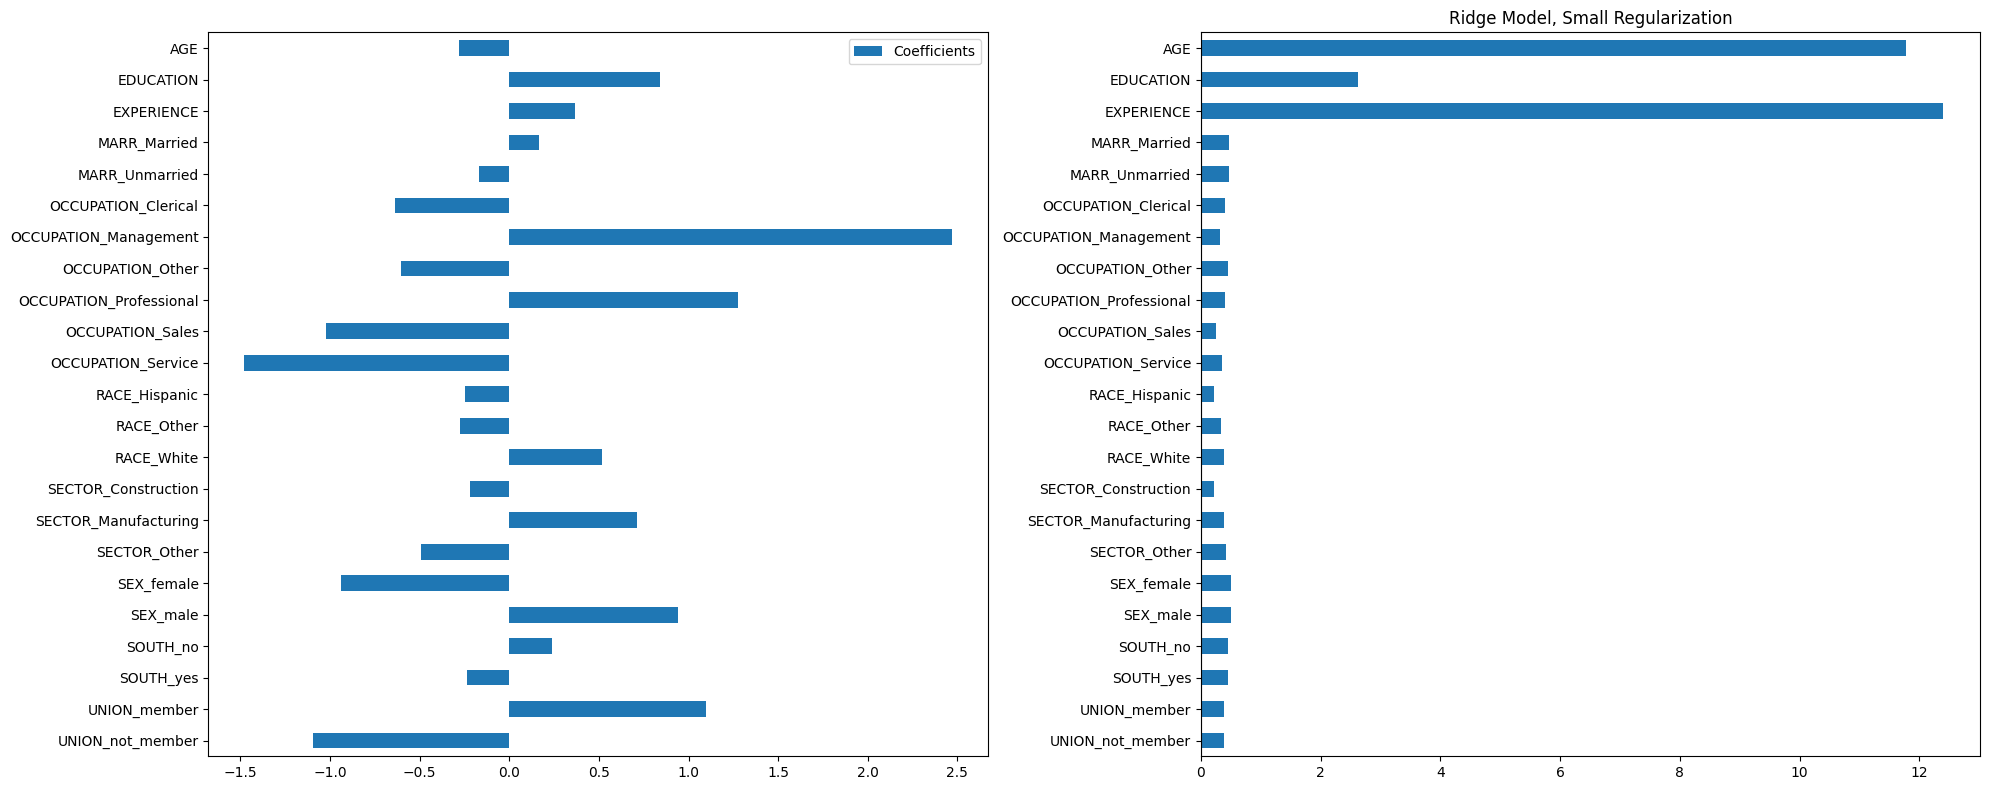

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

coefs.plot.barh( ax=ax[0] )
plt.title("Ridge Model, Small Regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw Coefficient Values")
plt.subplots_adjust(left=0.3)



feature_std.plot.barh( ax=ax[1] )

plt.tight_layout()
plt.show()

The greater the variance of a feature, the larger the weight of the corresponding coefficient 
on the output, all else being equal.

In [20]:
# pd.DataFrame(
#     rgr.coef_ * x.std(axis=0),
#     columns=["Coefficient Importance"],
#     index=feature_names,
# )

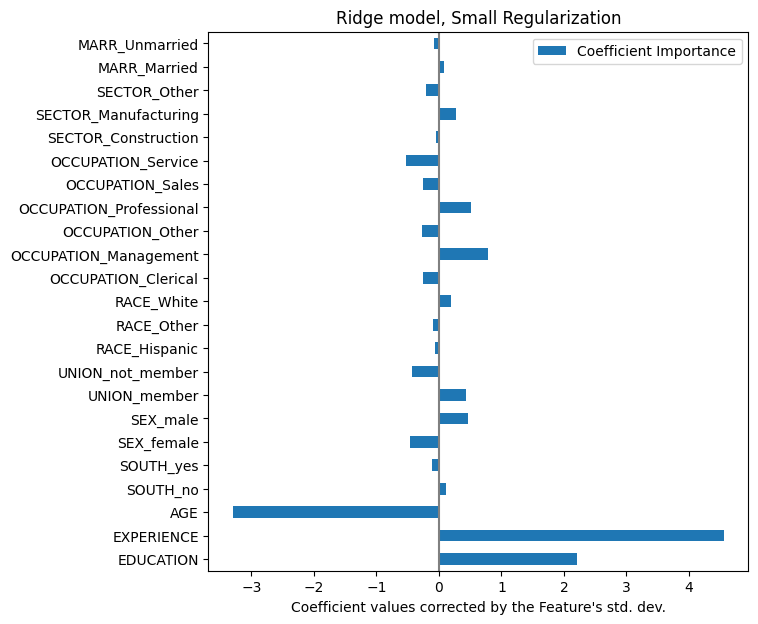

In [21]:
coefs = pd.DataFrame(
    rgr.coef_ * x_train.std(axis=0),
    columns=["Coefficient Importance"],
    index=feature_names,
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the Feature's std. dev.")
plt.title("Ridge model, Small Regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Checking the Variability of the Coefficients

Build the Model using the Entire Dataset

In [22]:
_X1 = X[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = X.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X3 = encoder.fit_transform(_X2)
_X4 = pd.DataFrame(_X3.toarray(), columns=encoder.get_feature_names_out())

x = pd.concat([_X1.reset_index(drop=True), _X4.reset_index(drop=True)], axis=1)

Cross Validation, Coefficient Importance, and its Variability

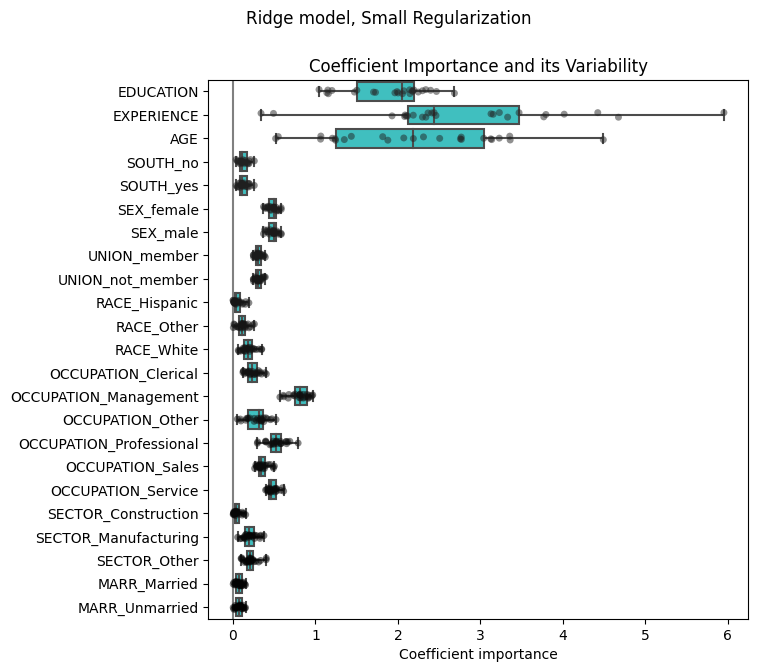

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

rgr = Ridge(alpha=1e-6)
rgr.fit(x, y)
 
    
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

cv_model = cross_validate(
    rgr,
    x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
    error_score='raise'
)

# Combine "estimator" & each "fold" of train-valid 
# estimator_folds_index = zip(cv_model["estimator"], cv.split(x, y))

# # Check
# coef_per_fold = [rgr.fit(x.iloc[trn_idx,:],y[trn_idx]).coef_ for trn_idx,val_idx  in cv.split(x, y)]
# coef_var_across_folds = np.array(coef_per_fold).std(axis=0).reshape(1,-1)
# coefs = pd.DataFrame( coef_var_across_folds, columns=x.columns )

# # Check
# xbeta_per_fold = [ (rgr.coef_*x.iloc[trn_idx,:]).std(axis=0) for trn_idx,val_idx  in cv.split(x, y) ]
# coefs = pd.DataFrame( xbeta_per_fold )


xbeta_per_fold = [ (est.fit(x.iloc[trn_idx,:],y[trn_idx]).coef_ * x.iloc[trn_idx]).std(axis=0) 
                  for est, (trn_idx,val_idx)  in zip(cv_model["estimator"], cv.split(x, y))  
                 ]
coefs = pd.DataFrame( xbeta_per_fold )

plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)

plt.axvline(x=0, color=".5")

plt.xlabel("Coefficient importance")
plt.title("Coefficient Importance and its Variability")
plt.suptitle("Ridge model, Small Regularization")
plt.subplots_adjust(left=0.3)

###  The Problem of Correlated Features

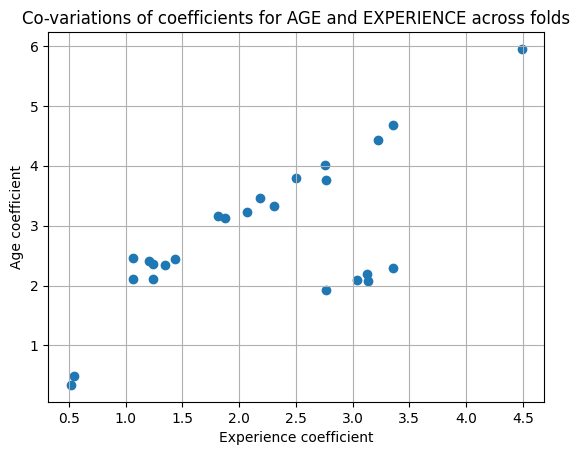

In [24]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
#plt.xlim(-0.4, 0.5)
#plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

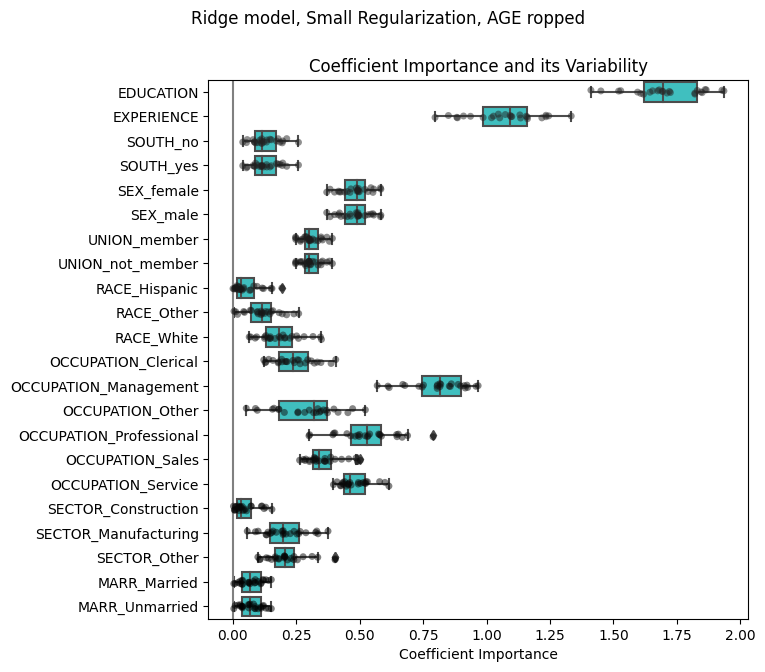

In [25]:
column_to_drop = ["AGE"]

_x = x.drop(columns=column_to_drop)

rgr = Ridge(alpha=1e-6)
rgr.fit(_x, y)
 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)


cv_model = cross_validate(
    rgr,
    _x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

xbeta_per_fold = [ (est.fit(_x.iloc[trn_idx,:],y[trn_idx]).coef_ * _x.iloc[trn_idx]).std(axis=0) 
                  for est, (trn_idx,val_idx)  in zip(cv_model["estimator"], cv.split(x, y))  
                 ]
coefs = pd.DataFrame( xbeta_per_fold )


plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient Importance and its Variability")
plt.xlabel("Coefficient Importance")
plt.suptitle("Ridge model, Small Regularization, AGE ropped")
plt.subplots_adjust(left=0.3)

---

## Part 4

### Linear Model with (Numeric) Data Scaling

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# scaler  = StandardScaler()
scaler  = MinMaxScaler()

encoder = OneHotEncoder()

_X1 = X_train[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X_train.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x_train = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)


_X1 = X_test[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X_test.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x_test = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)

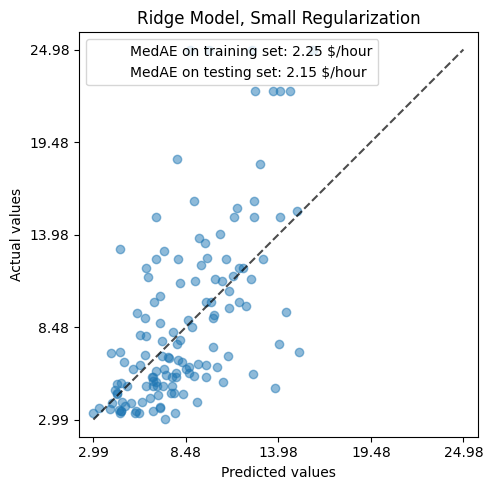

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import median_absolute_error
from sklearn.metrics import PredictionErrorDisplay


rgr = Ridge(alpha=1e-2)
rgr.fit(x_train, y_train)

mae_train = median_absolute_error(y_train, rgr.predict(x_train))
y_pred    = rgr.predict(x_test)
mae_test  = median_absolute_error(y_test, y_pred)

scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)

ax.set_title("Ridge Model, Small Regularization")

for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

#### Interpreting Coefficients: 

Model Coefficients with Data with Scaling

In [29]:
feature_names = list(x_train.columns)

coefs = pd.DataFrame(
    rgr.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

# coefs

The Standard Deviations of Different Features

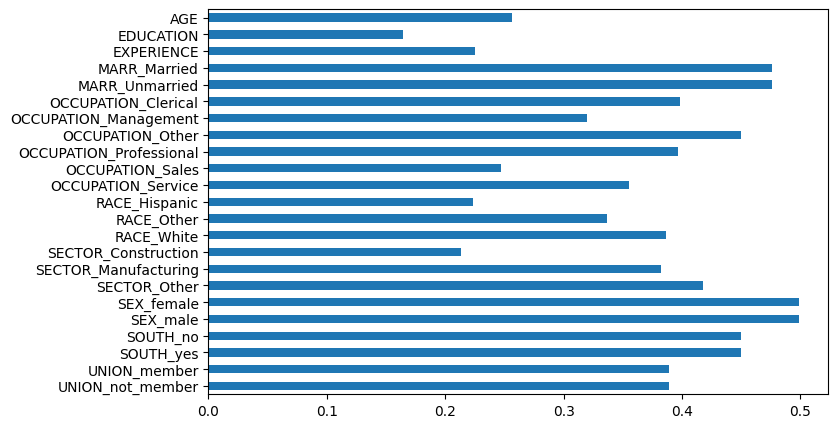

In [30]:
feature_std = x_train.std().sort_index(ascending=False, inplace=False)
feature_std.plot.barh( figsize=(8,5) )

plt.show()

#### Conditional Dependencies 
It is the dependencies between a specific feature and the target when all other features remain 
constant.

#### Un-Scaled Feature Variance 

Because of thee use of  OneHotEncoder, most of tthe features vary on a small scale, while others, such as, AGE, EXPERIENCE, & EDUCATION, varies a lot more, like several decades.

In [31]:
coefs =  coefs.sort_index(ascending=False, inplace=False)
feature_std = x_train.std().sort_index(ascending=False, inplace=False)

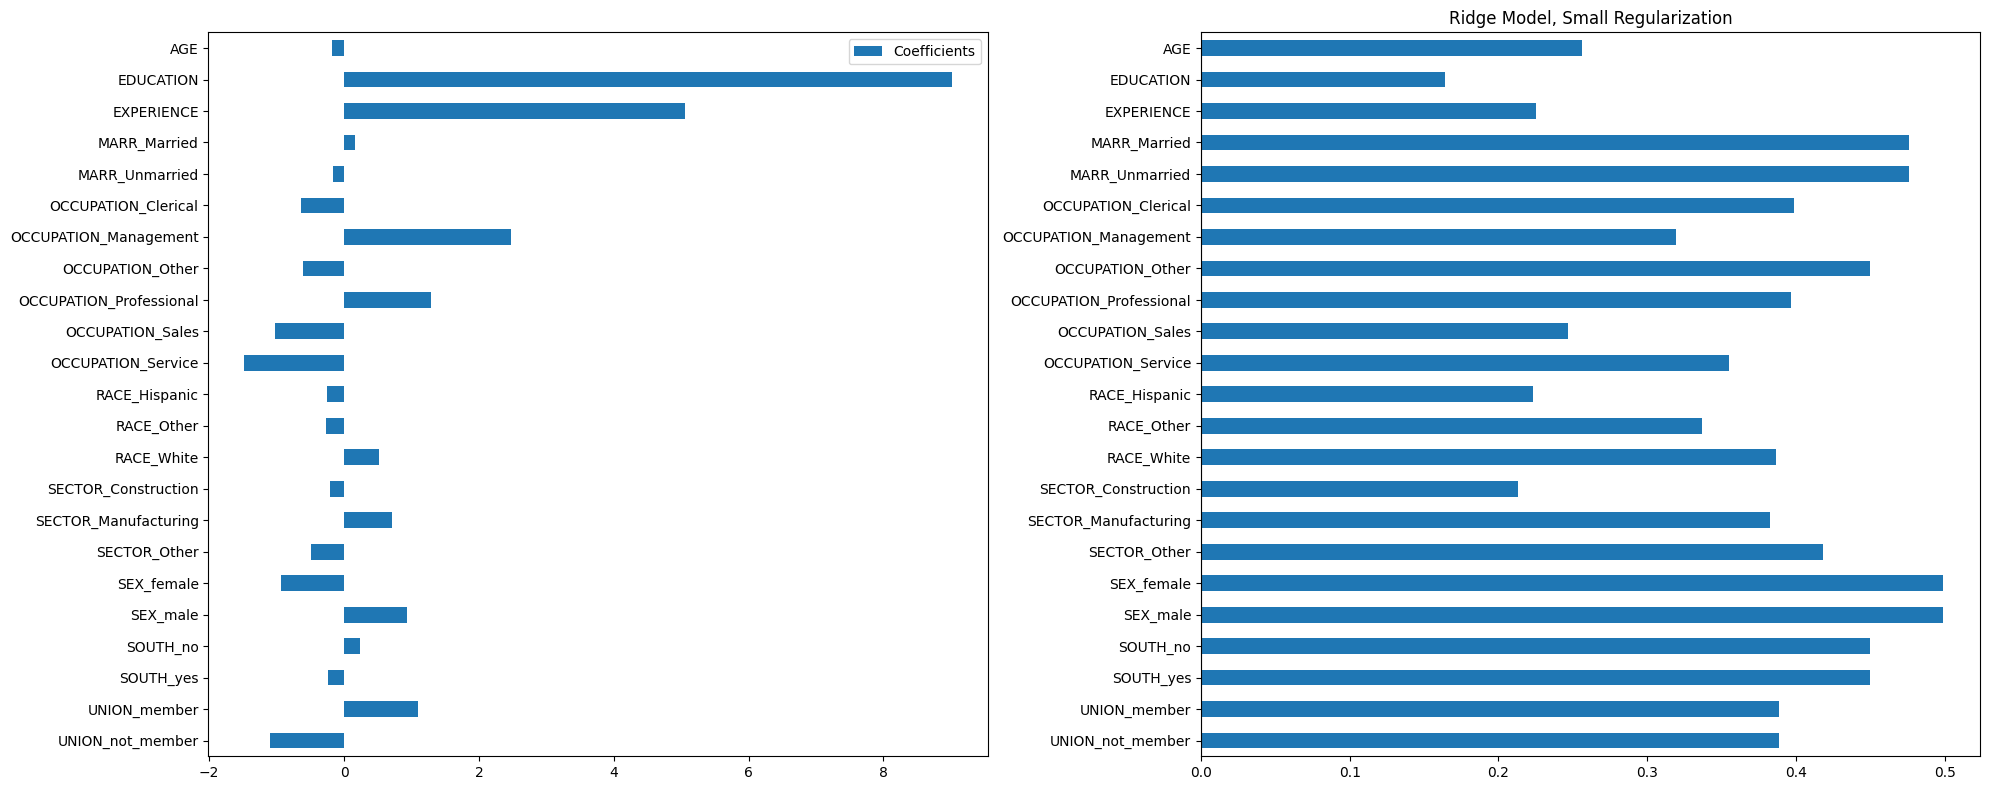

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

coefs.plot.barh( ax=ax[0] )
plt.title("Ridge Model, Small Regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw Coefficient Values")
plt.subplots_adjust(left=0.3)



feature_std.plot.barh( ax=ax[1] )

plt.tight_layout()
plt.show()

The greater the variance of a feature, the larger the weight of the corresponding coefficient 
on the output, all else being equal.

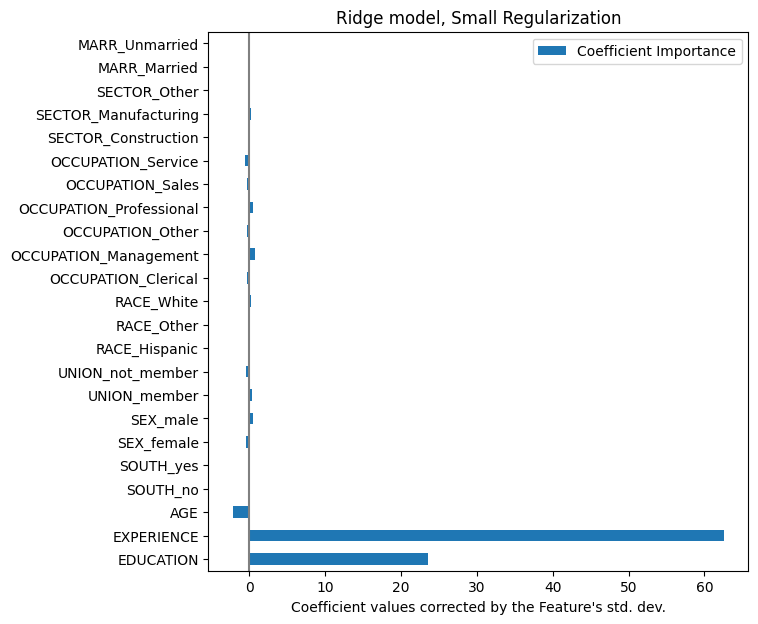

In [33]:
coefs = pd.DataFrame(
    rgr.coef_ * x.std(axis=0),
    columns=["Coefficient Importance"],
    index=feature_names,
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the Feature's std. dev.")
plt.title("Ridge model, Small Regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Checking the Variability of the Coefficients

Build the Model using the Entire Dataset

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


_X1 = X[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)

Cross Validation, Coefficient Importance, and its Variability

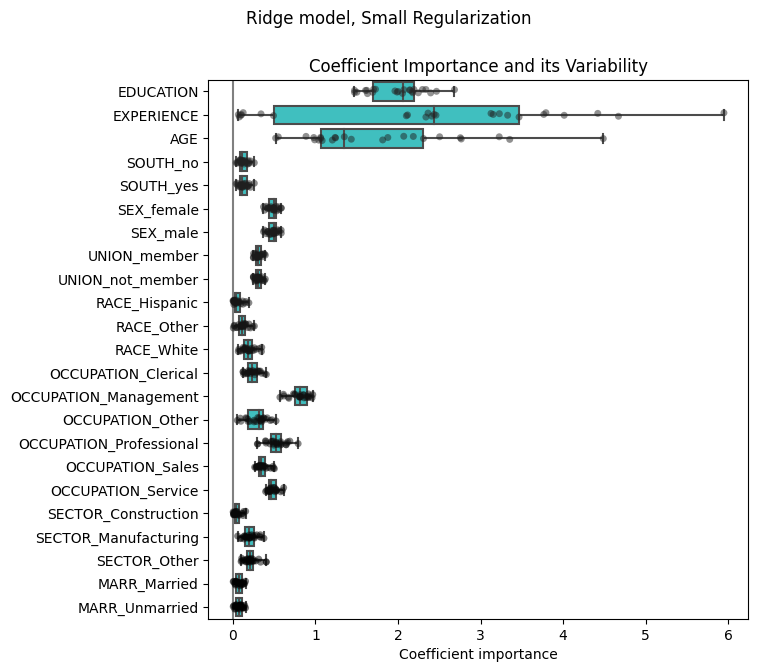

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

rgr = Ridge(alpha=1e-6)
rgr.fit(x, y)
 
    
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

cv_model = cross_validate(
    rgr,
    x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
    error_score='raise'
)

xbeta_per_fold = [ (est.fit(x.iloc[trn_idx,:],y[trn_idx]).coef_ * x.iloc[trn_idx]).std(axis=0) 
                  for est, (trn_idx,val_idx)  in zip(cv_model["estimator"], cv.split(x, y))  
                 ]
coefs = pd.DataFrame( xbeta_per_fold )

plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)

plt.axvline(x=0, color=".5")

plt.xlabel("Coefficient importance")
plt.title("Coefficient Importance and its Variability")
plt.suptitle("Ridge model, Small Regularization")
plt.subplots_adjust(left=0.3)

###  The Problem of Correlated Features

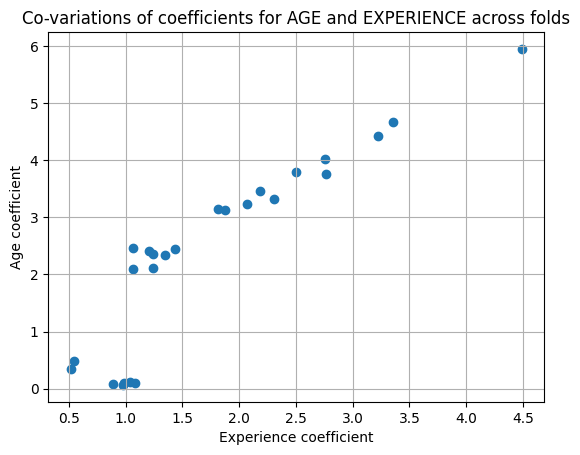

In [36]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
#plt.xlim(-0.4, 0.5)
#plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

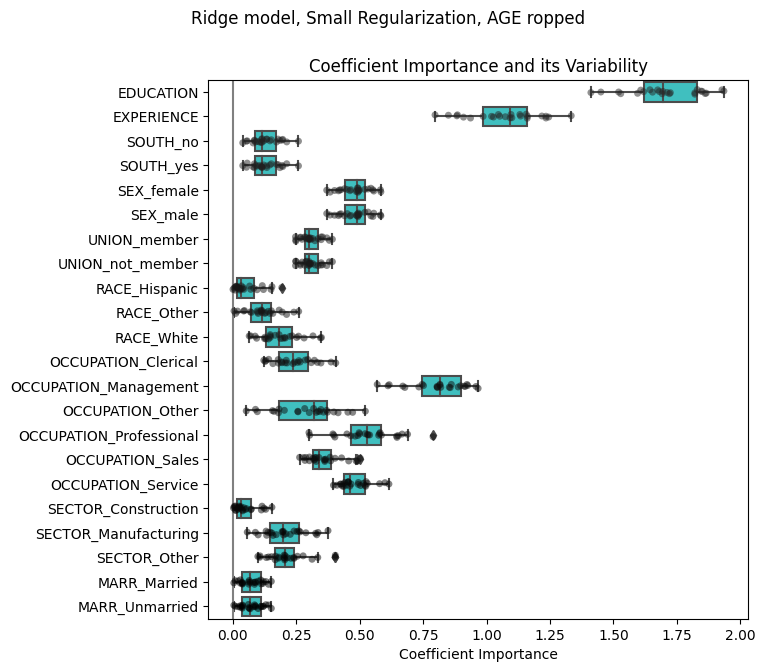

In [37]:
column_to_drop = ["AGE"]

_x = x.drop(columns=column_to_drop)

rgr = Ridge(alpha=1e-6)
rgr.fit(_x, y)
 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)


cv_model = cross_validate(
    rgr,
    _x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

xbeta_per_fold = [ (est.fit(_x.iloc[trn_idx,:],y[trn_idx]).coef_ * _x.iloc[trn_idx]).std(axis=0) 
                  for est, (trn_idx,val_idx)  in zip(cv_model["estimator"], cv.split(x, y))  
                 ]
coefs = pd.DataFrame( xbeta_per_fold )


plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient Importance and its Variability")
plt.xlabel("Coefficient Importance")
plt.suptitle("Ridge model, Small Regularization, AGE ropped")
plt.subplots_adjust(left=0.3)

---

## Part 5
### Linear Model with Data Scaling & Regularization

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# scaler  = StandardScaler()
scaler  = MinMaxScaler()
encoder = OneHotEncoder()


_X1 = X_train[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X_train.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x_train = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)


_X1 = X_test[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X_test.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x_test = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)

#### LASSO Regularization Model

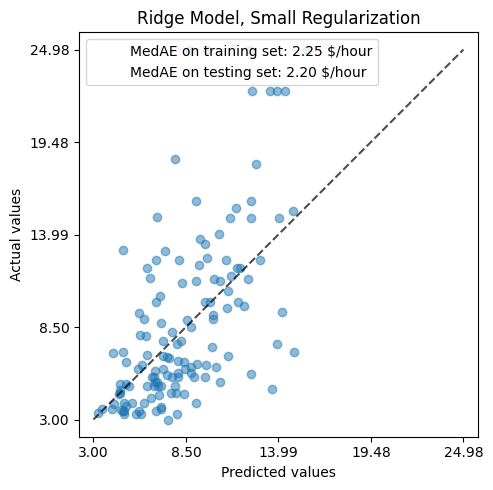

In [40]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import median_absolute_error
from sklearn.metrics import PredictionErrorDisplay

alphas = np.logspace(-10, 10, 21)  
rgr = LassoCV(alphas=alphas, max_iter=100000)
rgr.fit(x_train, y_train)

mae_train = median_absolute_error(y_train, rgr.predict(x_train))
y_pred    = rgr.predict(x_test)
mae_test  = median_absolute_error(y_test, y_pred)

scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

fig, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, 
    y_pred, 
    kind="actual_vs_predicted", 
    ax=ax, 
    scatter_kwargs={"alpha": 0.5}
)

ax.set_title("Ridge Model, Small Regularization")

for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

#### Interpreting Coefficients: 

Model Coefficients with Data with Scaling

In [41]:
feature_names = list(x_train.columns)

coefs = pd.DataFrame(
    rgr.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

# coefs

#### Conditional Dependencies 
It is the dependencies between a specific feature and the target when all other features remain 
constant.

#### Un-Scaled Feature Variance 

Because of thee use of  OneHotEncoder, most of tthe features vary on a small scale, while others, such as, AGE, EXPERIENCE, & EDUCATION, varies a lot more, like several decades.

In [42]:
coefs =  coefs.sort_index(ascending=False, inplace=False)
feature_std = x_train.std().sort_index(ascending=False, inplace=False)

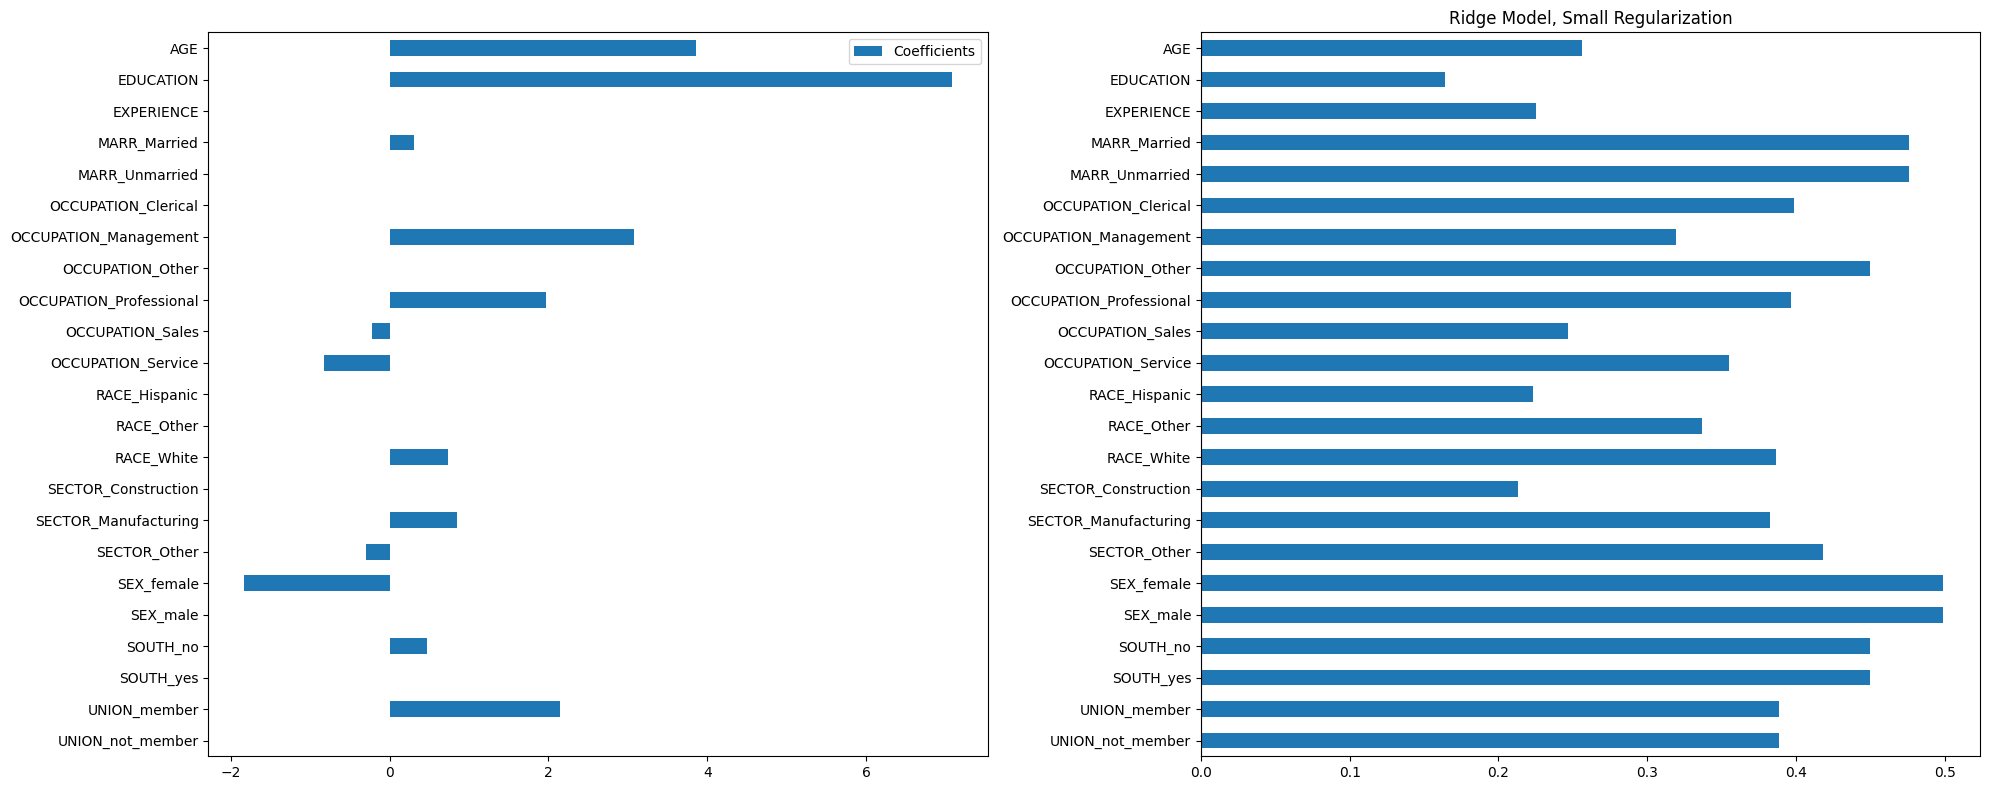

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

coefs.plot.barh( ax=ax[0] )
plt.title("Ridge Model, Small Regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw Coefficient Values")
plt.subplots_adjust(left=0.3)



feature_std.plot.barh( ax=ax[1] )

plt.tight_layout()
plt.show()

The greater the variance of a feature, the larger the weight of the corresponding coefficient 
on the output, all else being equal.

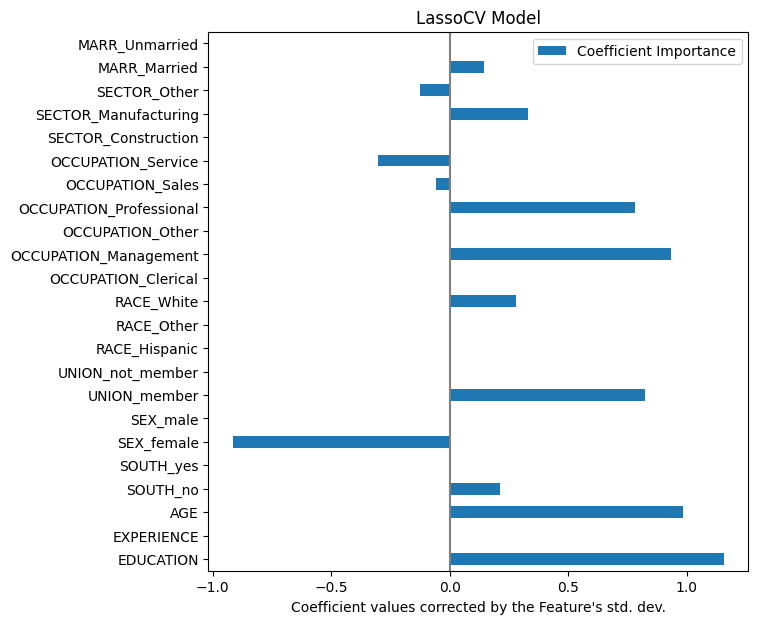

In [44]:
coefs = pd.DataFrame(
    rgr.coef_ * x.std(axis=0),
    columns=["Coefficient Importance"],
    index=feature_names,
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the Feature's std. dev.")
plt.title("LassoCV Model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Checking the Variability of the Coefficients

Build the Model using the Entire Dataset

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

scaler  = MinMaxScaler()
encoder = OneHotEncoder()


_X1 = X[['EDUCATION','EXPERIENCE','AGE']].copy()
_X2 = scaler.fit_transform(_X1)
_X3 = pd.DataFrame(_X2, columns=scaler.get_feature_names_out())
_X4 = X.drop(columns=['EDUCATION','EXPERIENCE','AGE'], axis=1)
_X5 = encoder.fit_transform(_X4)
_X6 = pd.DataFrame(_X5.toarray(), columns=encoder.get_feature_names_out())

x = pd.concat([_X3.reset_index(drop=True), _X6.reset_index(drop=True)], axis=1)

Cross Validation, Coefficient Importance, and its Variability

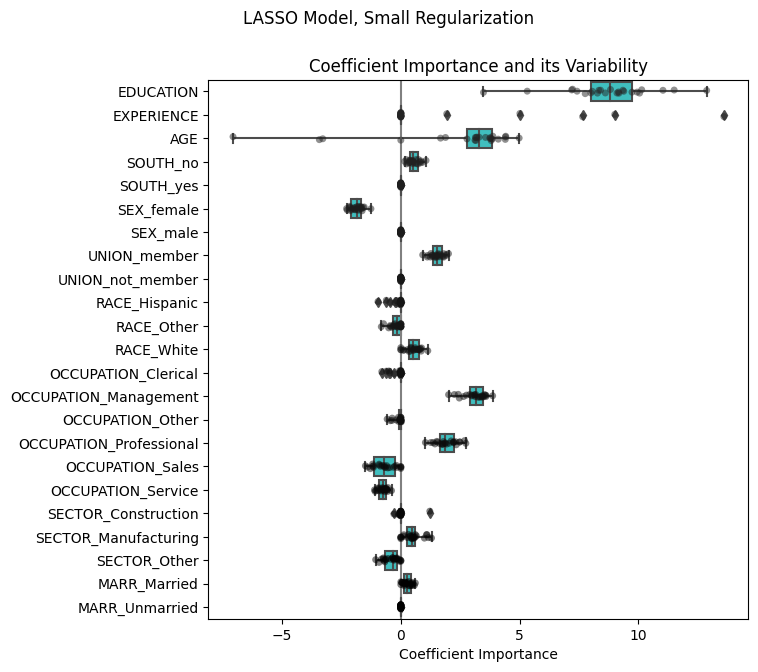

In [46]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

alphas = np.logspace(-5, 5, 21)  
rgr = LassoCV(alphas=alphas, max_iter=100000)
rgr.fit(x_train, y_train)
 
    
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

cv_model = cross_validate(
    rgr,
    x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
    error_score='raise'
)

xbeta_per_fold = [ est.coef_ for est in cv_model["estimator"] ]
coefs = pd.DataFrame( xbeta_per_fold, columns=x.columns )

plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)

plt.axvline(x=0, color=".5")

plt.xlabel("Coefficient Importance")
plt.title("Coefficient Importance and its Variability")
plt.suptitle("LASSO Model, Small Regularization")
plt.subplots_adjust(left=0.3)

### Part 5a : Model Coefficients as a function of the Lasso Regularization

All features are normalized/scaled. 

In [47]:
from sklearn.linear_model import Lasso, Ridge

alphas = np.logspace(5, -5, 21)  
coefs = []

for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False, tol=0.001, max_iter=1000000)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
    
a = pd.DataFrame( alphas, columns=['alphas'])
c = pd.DataFrame( coefs, columns=x.columns)
df = pd.concat([a,c], axis=1)
# df.head(3)

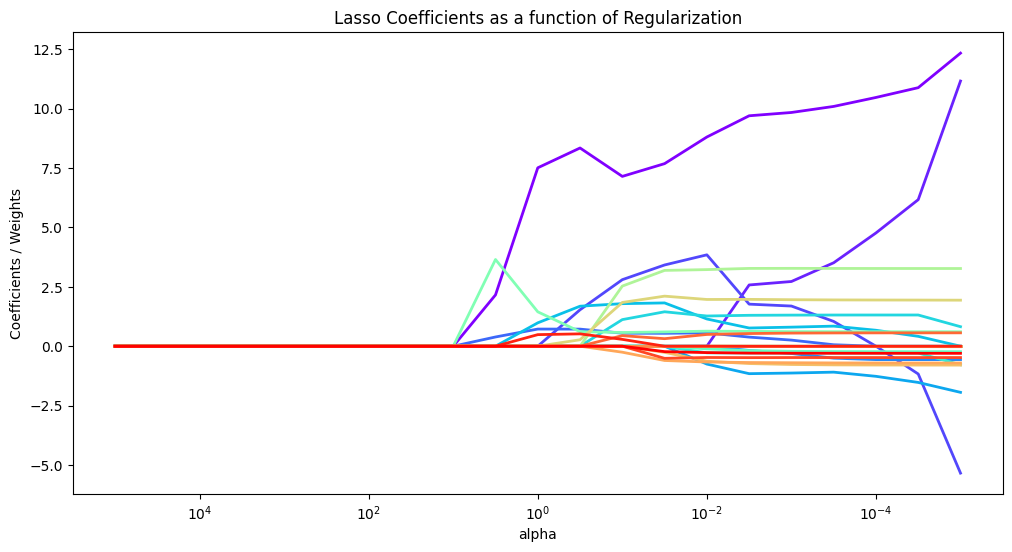

In [48]:
fig = plt.figure( figsize=(12,6) )

colors = plt.cm.rainbow( np.linspace(0, 1, x.shape[1]))
for i in range(x.shape[1]):
    plt.plot(df[df.columns[0]], df[ df.columns[i+1] ], linewidth=2, color=colors[i] )


#plt.plot(alphas, coefs, linewidth=2)

plt.xscale("log")
plt.xlim(plt.xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients / Weights")
plt.title("Lasso Coefficients as a function of Regularization")
plt.axis("tight")
plt.show()

### Part 5b : Model Coefficients as a function of the Ridge Regularization

All features are  normalized/scaled.

In [49]:
from sklearn.linear_model import Lasso, Ridge

alphas = np.logspace(5, -5, 21)  
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False, tol=0.001, max_iter=1000000)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
    
a = pd.DataFrame( alphas, columns=['alphas'])
c = pd.DataFrame( coefs, columns=x.columns)
df = pd.concat([a,c], axis=1)

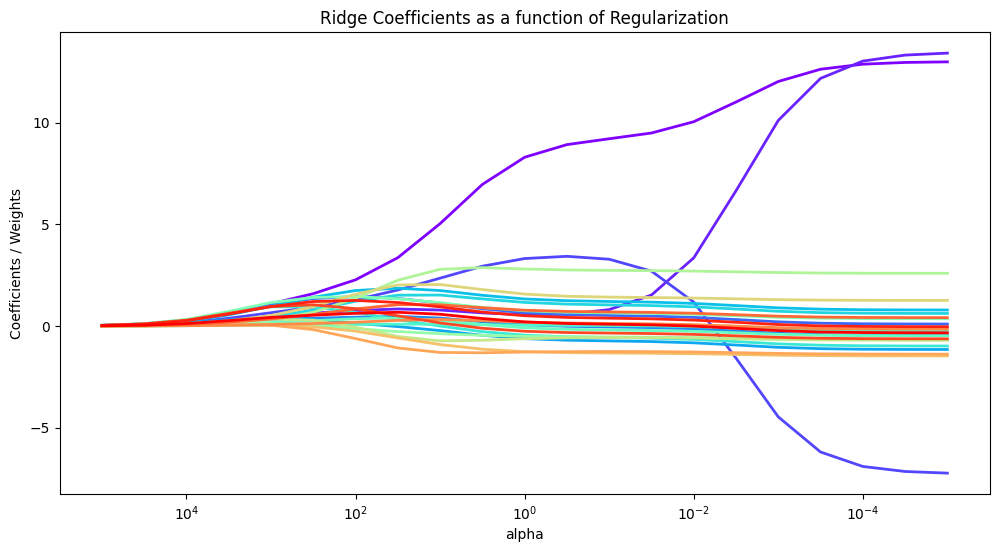

In [50]:
fig = plt.figure( figsize=(12,6) )

colors = plt.cm.rainbow( np.linspace(0, 1, x.shape[1]))
for i in range(x.shape[1]):
    plt.plot(df[df.columns[0]], df[ df.columns[i+1] ], linewidth=2, color=colors[i] )


#plt.plot(alphas, coefs, linewidth=2)

plt.xscale("log")
plt.xlim(plt.xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Coefficients / Weights")
plt.title("Ridge Coefficients as a function of Regularization")
plt.axis("tight")
plt.show()